In [2]:
# Importing libraries
import pandas as pd
from pandas import DataFrame, Series

# Setting up the dataset as a Dataframe
titanic_df = pd.read_csv('C:/Users/iusti/Downloads/titanic/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Details about the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Importing other libraries for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Number of passenger by Sex
titanic_df.groupby(['Sex'])[['PassengerId']].count()

,PassengerId
Sex,
female,314
male,577


<AxesSubplot:xlabel='Sex', ylabel='count'>

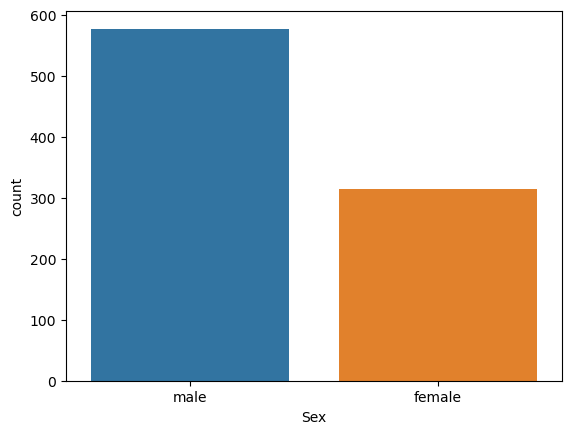

In [6]:
# Visualization of the above data
sns.countplot(x = 'Sex', data=titanic_df)

In [7]:
# Each sex across different class 
sexdf = DataFrame(titanic_df[['Sex','Pclass']].value_counts())
sexdf.columns = ['count']
sexdf.unstack()

count          
Pclass     1    2    3
Sex                   
female    94   76  144
male     122  108  347

<AxesSubplot:xlabel='Pclass', ylabel='count'>

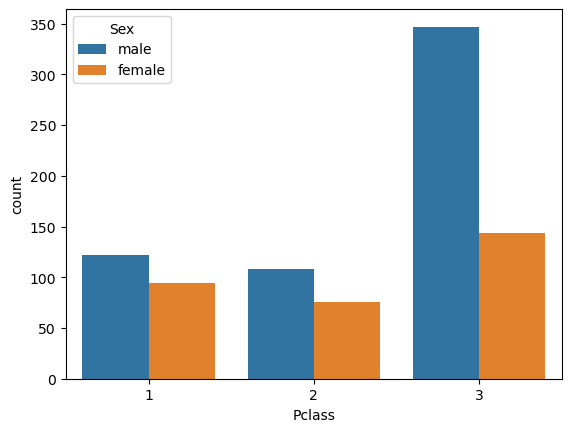

In [8]:
# Visualiztion of the above data
sns.countplot(x ='Pclass', hue = 'Sex',data = titanic_df)

In [9]:
# Creating a function to fullfil child criteria
def person(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

# Applying the function and creating a new column "person"
titanic_df['person'] = titanic_df[['Age','Sex']].apply(person, axis=1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [10]:
# Number of passengers
DataFrame(titanic_df['person'].value_counts())

,person
male,537
female,271
child,83


In [11]:
# Each person across different different class
pdf = titanic_df.groupby(['person','Pclass'])[['PassengerId']].count()
pdf.columns = ['count']
pdf.unstack()

count         
Pclass     1   2    3
person               
child      6  19   58
female    91  66  114
male     119  99  319

<AxesSubplot:xlabel='Pclass', ylabel='count'>

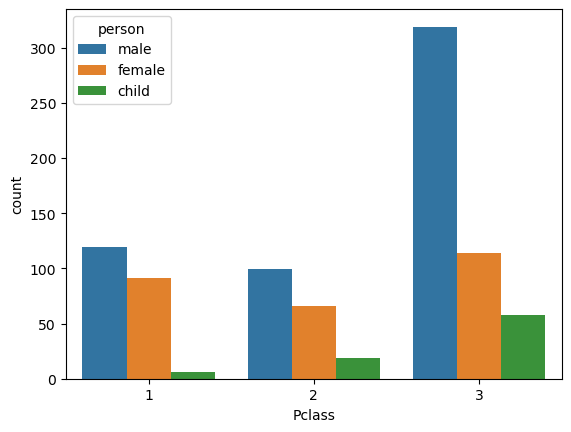

In [12]:
# Visualization of the above data
sns.countplot(x = "Pclass", hue = "person", data = titanic_df)

In [13]:
# Calculating the average age of the passengers
titanic_df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Count'>

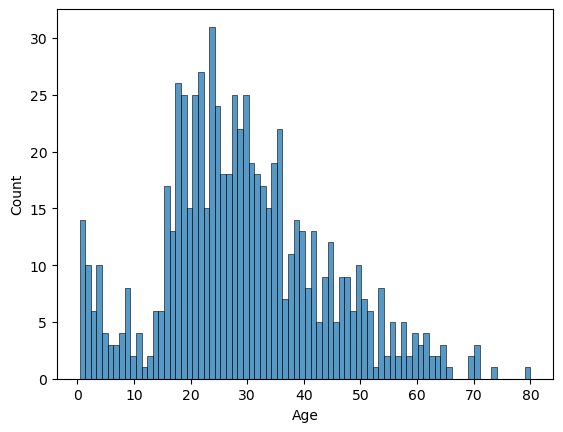

In [14]:
# Visualize the distribution of the age of the passengers
sns.histplot(x = 'Age', data = titanic_df, bins=80)

In [15]:
# Average age across person
titanic_df.groupby(['person'])[['Age']].mean().round()

,Age
person,
child,6.0
female,32.0
male,33.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

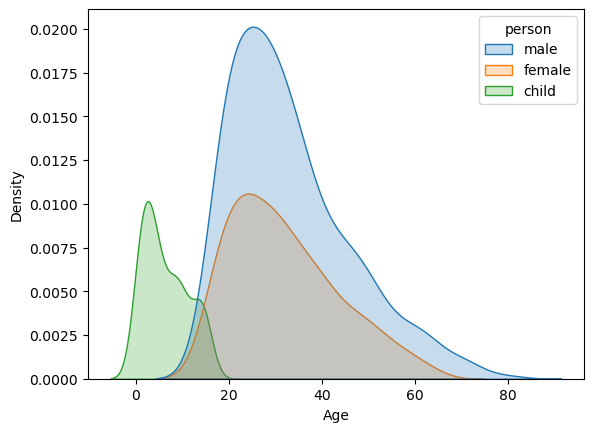

In [16]:
# KDE plot of the above data
sns.kdeplot(x = "Age", hue= 'person', data = titanic_df, fill = True)

In [17]:
# Average age across different Class
titanic_df.groupby(['Pclass'])[['Age']].mean().round()

,Age
Pclass,
1,38.0
2,30.0
3,25.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

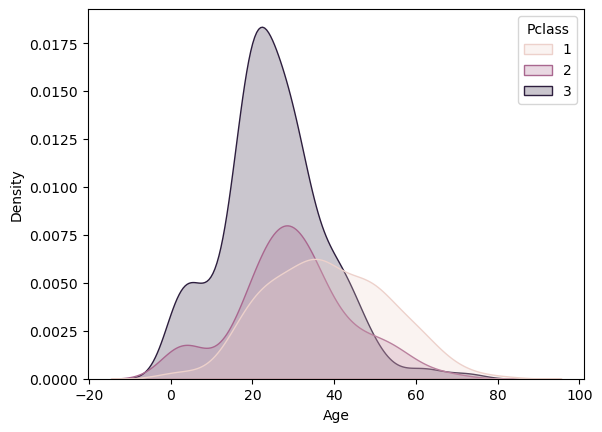

In [18]:
# KDE plot of the above data
sns.kdeplot(x = "Age", hue= 'Pclass', data = titanic_df, fill = True)

In [19]:
titanic_df_v2 = titanic_df.copy()
titanic_df_v2.dropna(subset='Cabin', inplace= True)
titanic_df_v2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female


In [20]:
# Creating a deck column
letter = []
for values in titanic_df_v2['Cabin']:
    letter.append(values[0])
titanic_df_v2['deck'] = letter
titanic_df_v2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,B


In [21]:
# Number of passengers in each deck
DataFrame(titanic_df_v2['deck'].value_counts().sort_index())

,deck
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1


<AxesSubplot:xlabel='deck', ylabel='count'>

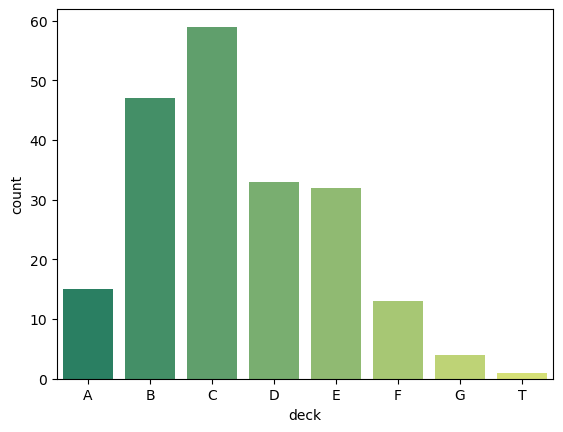

In [22]:
# Visualizing the above data
sns.countplot(x = "deck", data = titanic_df_v2, palette="summer", order= ['A','B','C','D','E','F','G','T'])

In [23]:
# Number of passengers in each Cabin by Class
dcl = DataFrame(titanic_df_v2[['deck','Pclass']].value_counts().sort_index())
dcl.columns = ['count']
dcl.unstack(fill_value = 0)

count      
Pclass     1  2  3
deck              
A         15  0  0
B         47  0  0
C         59  0  0
D         29  4  0
E         25  4  3
F          0  8  5
G          0  0  4
T          1  0  0

<AxesSubplot:xlabel='deck', ylabel='count'>

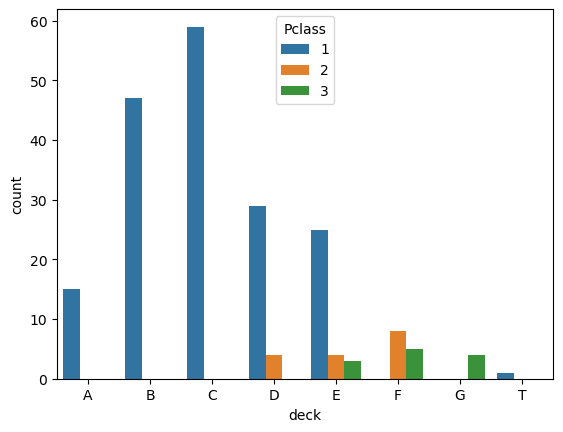

In [24]:
# Visualizing the above data
sns.countplot(x = "deck", hue = 'Pclass', data = titanic_df_v2, order= ['A','B','C','D','E','F','G','T'])

In [25]:
# Average fare of each deck
titanic_df_v2.groupby(['deck'])[['Fare']].mean().round()

,Fare
deck,
A,40.0
B,114.0
C,100.0
D,57.0
E,46.0
F,19.0
G,14.0
T,36.0


<AxesSubplot:xlabel='deck', ylabel='Fare'>

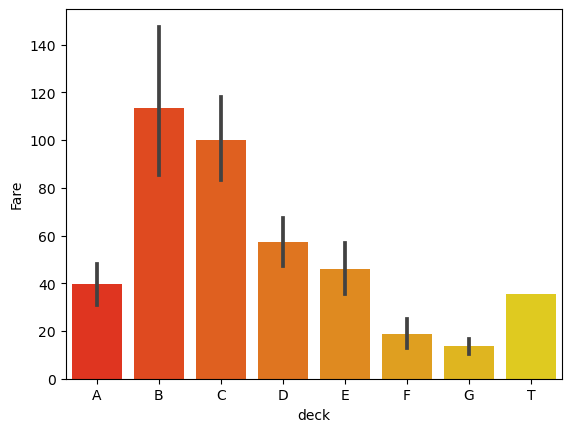

In [26]:
#Visualization of the above data
sns.barplot(x = 'deck', y = 'Fare', data = titanic_df_v2, palette='autumn', order = ['A','B','C','D','E','F','G','T'])

In [27]:
# Number of passengers from each embark
emb = DataFrame(titanic_df['Embarked'].value_counts())
emb.columns = ['count']
emb

,count
S,644
C,168
Q,77


<AxesSubplot:xlabel='Embarked', ylabel='count'>

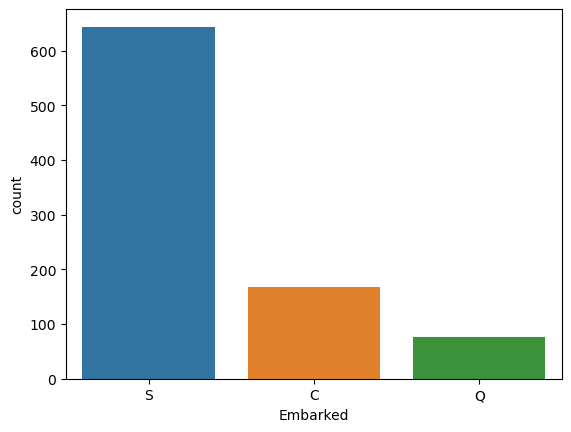

In [28]:
#Visualizing the above data
sns.countplot(x = 'Embarked', data = titanic_df)

In [29]:
# Number of passengers from each Embark by Class
embdf = titanic_df.groupby(['Embarked','Pclass'])[['PassengerId']].count()
embdf.columns = ['count']
embdf.unstack()

count          
Pclass       1    2    3
Embarked                
C           85   17   66
Q            2    3   72
S          127  164  353

<AxesSubplot:xlabel='Embarked', ylabel='count'>

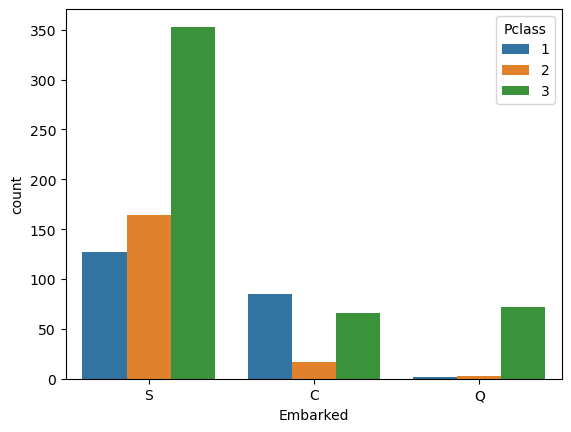

In [30]:
# Visualizing the above data
sns.countplot(x = 'Embarked', hue = 'Pclass', data = titanic_df)

In [31]:
# Adding a new column 'Family'
titanic_df['family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


In [32]:
# Adding another column to update the family status
titanic_df['family_status'] = np.where(titanic_df['family'] > 0, "With Family", "Alone")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,family,family_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0,Alone


In [33]:
# Number of lone passengers and family passengers
fam = DataFrame(titanic_df['family_status'].value_counts())
fam.columns = ['count']
fam

,count
Alone,537
With Family,354


In [34]:
# Number of passengers with family count
famdf = titanic_df.groupby(['family'])[['PassengerId']].count()
famdf.columns = ['count']
famdf

,count
family,
0,537
1,161
2,102
3,29
4,15
5,22
6,12
7,6
10,7


<AxesSubplot:xlabel='family', ylabel='count'>

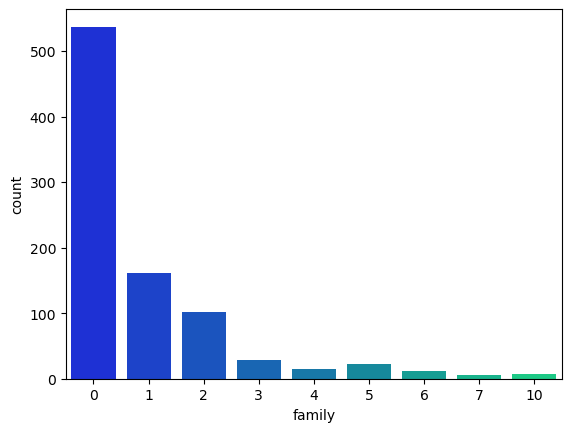

In [35]:
# Visualization of the above data
sns.countplot(x = 'family', data = titanic_df, palette = 'winter')

In [36]:
# Number of family members by each class
famcl = titanic_df.groupby(['Pclass','family_status'])[['family']].count()
famcl.columns = ['count']
famcl.unstack()

count            
family_status Alone With Family
Pclass                         
1               109         107
2               104          80
3               324         167

<AxesSubplot:xlabel='Pclass', ylabel='count'>

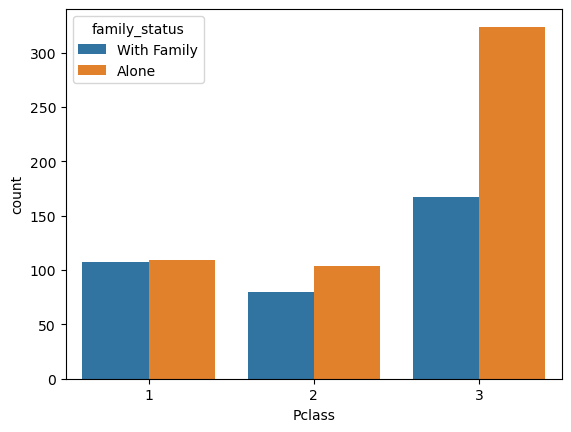

In [37]:
# Visualization of the above data
sns.countplot(x = 'Pclass', hue = 'family_status', data = titanic_df)

In [38]:
# Create a new column 'survivor'
titanic_df['survivor'] = titanic_df['Survived'].map({0:'No',1:'Yes'})
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,family,family_status,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0,Alone,Yes


In [39]:
# Number of survivors and deceased
surv = DataFrame(titanic_df.survivor.value_counts())
surv.columns = ['survivor_count']
surv

,survivor_count
No,549
Yes,342


<AxesSubplot:xlabel='survivor', ylabel='count'>

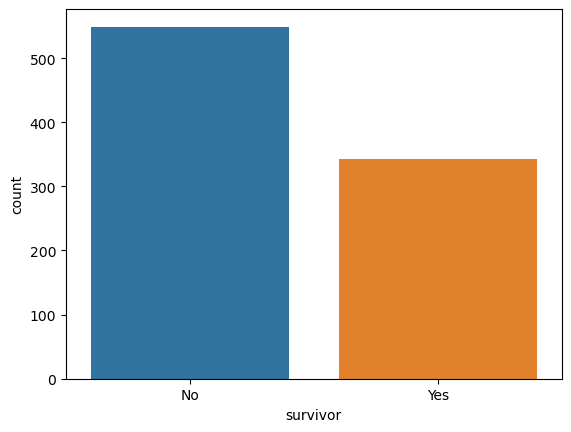

In [40]:
# Plotting the above data
sns.countplot(x = 'survivor', data = titanic_df)

In [41]:
# Number of survivors and deceased from each class
surdf = titanic_df.groupby(['Pclass','survivor'])[['survivor']].count()
surdf.columns = ['count']
surdf.unstack()

count     
survivor    No  Yes
Pclass             
1           80  136
2           97   87
3          372  119

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

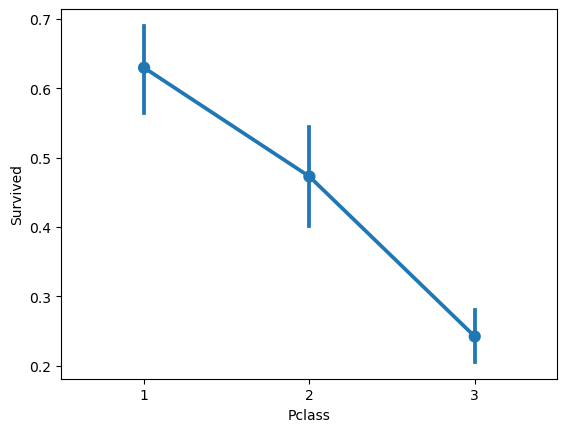

In [42]:
# Plotting the above data
sns.pointplot(x = 'Pclass', y = 'Survived', data = titanic_df)

In [43]:
# Number of survivors and deceased by 'person'
surdf_2 = titanic_df.groupby(['person','survivor'])[['survivor']].count()
surdf_2.columns = ['count']
surdf_2.unstack()

count     
survivor    No  Yes
person             
child       34   49
female      66  205
male       449   88

<AxesSubplot:xlabel='person', ylabel='Survived'>

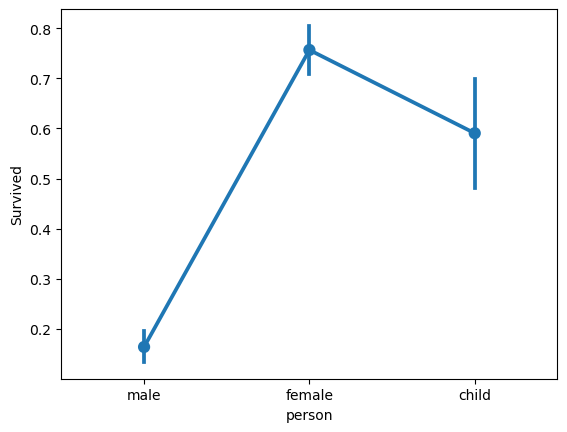

In [44]:
# Plotting the above data to get a clear picture
sns.pointplot(x = 'person', y = 'Survived', data = titanic_df)

In [45]:
# Distributing the above data by class
surdf_3 = titanic_df.groupby(['Pclass','person','survivor'])[['survivor']].count()
surdf_3.columns = ['count']
surdf_3.unstack(fill_value=0)

count    
survivor         No Yes
Pclass person          
1      child      1   5
       female     2  89
       male      77  42
2      child      0  19
       female     6  60
       male      91   8
3      child     33  25
       female    58  56
       male     281  38

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

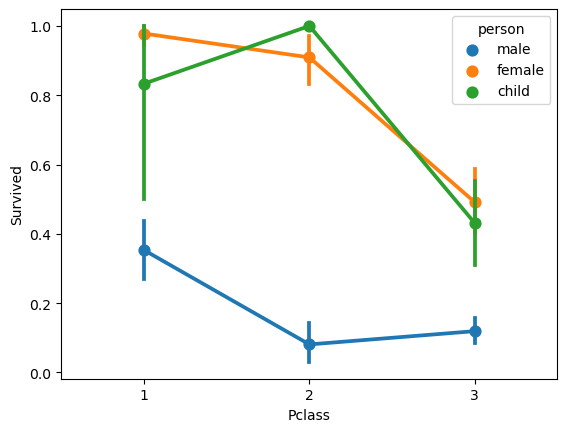

In [46]:
# Plotting the above data
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'person', data = titanic_df)

In [47]:
# Creating a new column 'age_group'
bins = [0, 10, 20, 35, 50, 70, np.inf]
names = ['<10','10-20','20-35','35-50','50-70','70+']
titanic_df['age_group'] = pd.cut(titanic_df['Age'], bins, labels = names )
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,family,family_status,survivor,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family,No,20-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family,Yes,35-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone,Yes,20-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family,Yes,20-35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone,No,20-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0,Alone,No,20-35
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0,Alone,Yes,10-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3,With Family,No,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0,Alone,Yes,20-35


In [48]:
# Number of survivor and deceased by age_group
agedf = titanic_df.groupby(['age_group','survivor'])[['survivor']].count()
agedf.columns = ['count']
agedf.unstack()

count     
survivor     No  Yes
age_group           
<10          26   38
10-20        71   44
20-35       193  125
35-50        92   61
50-70        38   21
70+           4    1

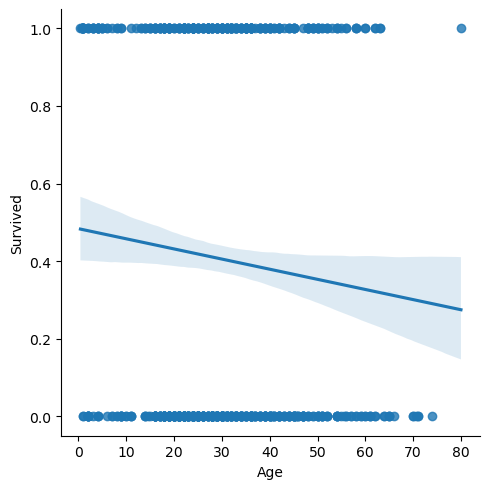

In [49]:
# Plotting suvival rate by age
sns.lmplot(x = 'Age', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='age_group', ylabel='Survived'>

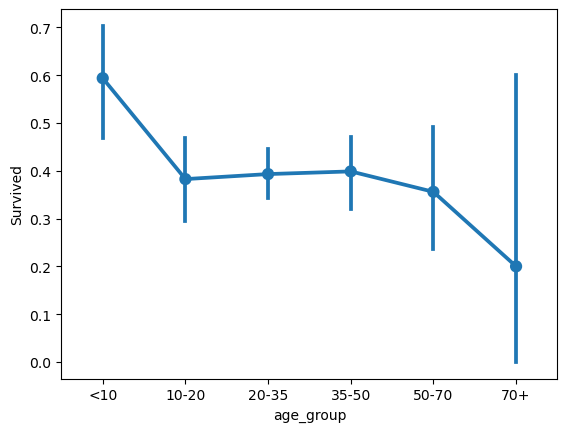

In [50]:
sns.pointplot(x = 'age_group', y = 'Survived', data = titanic_df)

In [51]:
# Grouping the above data by class
agecl_df = titanic_df.groupby(['age_group','Pclass','survivor'])[['survivor']].count()
agecl_df.columns = ['count']
agecl_df.unstack()

count    
survivor            No Yes
age_group Pclass          
<10       1          1   2
          2          0  17
          3         25  19
10-20     1          3  15
          2          9   9
          3         59  20
20-35     1         14  47
          2         50  38
          3        129  40
35-50     1         25  40
          2         19  16
          3         48   5
50-70     1         19  17
          2         12   3
          3          7   1
70+       1          2   1
          2          0   0
          3          2   0

<AxesSubplot:xlabel='age_group', ylabel='Survived'>

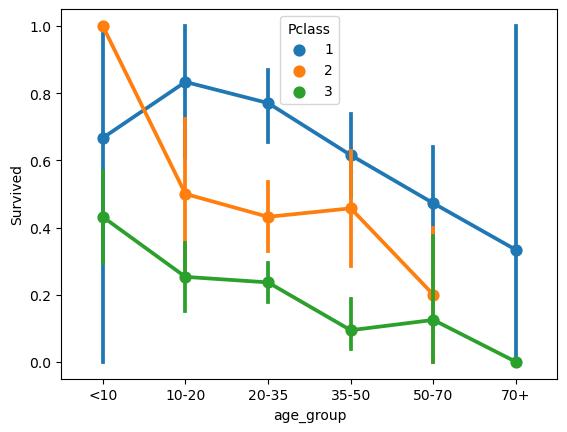

In [52]:
# Plotting the above data
sns.pointplot(x = 'age_group', y = 'Survived', hue= 'Pclass', data = titanic_df, errorbar= None)

In [53]:
# Grouping the age and survivor data by sex
agesex_df = titanic_df.groupby(['age_group','Sex','survivor'])[['survivor']].count()
agesex_df.columns = ['count']
agesex_df.unstack()

count    
survivor            No Yes
age_group Sex             
<10       female    12  19
          male      14  19
10-20     female    12  34
          male      59  10
20-35     female    24  87
          male     169  38
35-50     female    15  41
          male      77  20
50-70     female     1  16
          male      37   5
70+       female     0   0
          male       4   1

<AxesSubplot:xlabel='age_group', ylabel='Survived'>

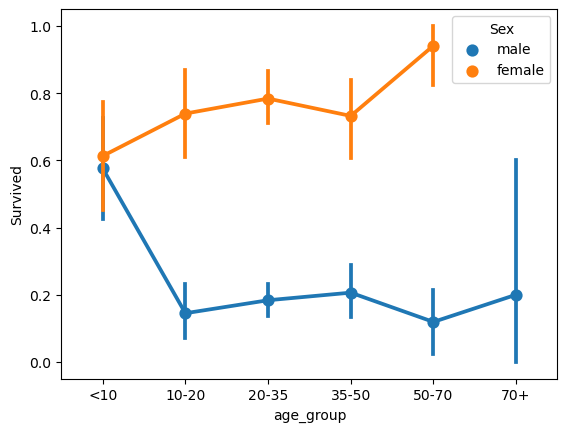

In [54]:
# Plotting the above data
sns.pointplot(x = 'age_group', y = 'Survived', hue = 'Sex', data = titanic_df, errorbar = None)

In [55]:
# Creating a new dataframe from the existing dataframe(Note - newly added columns are also included here)
dk = titanic_df.copy()
dk.dropna(subset='Cabin', inplace= True)

# Adding the 'survivor' column to the deck dataframe
titanic_df_v2['survivor'] = dk['survivor'].values
titanic_df_v2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,deck,survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E,No
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G,Yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,D,Yes
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,B,No
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,C,Yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,B,Yes


In [56]:
# Number of survivor and deceased from each cabin
surdk = titanic_df_v2.groupby(['deck','survivor'])[['survivor']].count()
surdk.columns = ['count']
surdk.unstack(fill_value=0)

count    
survivor    No Yes
deck              
A            8   7
B           12  35
C           24  35
D            8  25
E            8  24
F            5   8
G            2   2
T            1   0

<AxesSubplot:xlabel='deck', ylabel='Survived'>

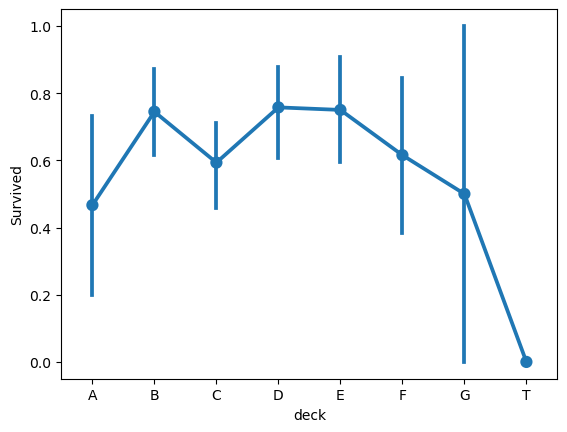

In [57]:
# Plotting the above data
sns.pointplot(x = 'deck', y = 'Survived', data = titanic_df_v2, order=["A","B","C","D","E","F","G","T"], errorbar= None)

In [58]:
# Grouping the survivor and deceased data by deck and sex
sursex = titanic_df_v2.groupby(['deck','Sex','survivor'])[['survivor']].count()
sursex.columns = ['count']
sursex.unstack(fill_value=0)

count    
survivor       No Yes
deck Sex             
A    female     0   1
     male       8   6
B    female     0  27
     male      12   8
C    female     3  24
     male      21  11
D    female     0  18
     male       8   7
E    female     1  14
     male       7  10
F    female     0   5
     male       5   3
G    female     2   2
T    male       1   0

<AxesSubplot:xlabel='deck', ylabel='Survived'>

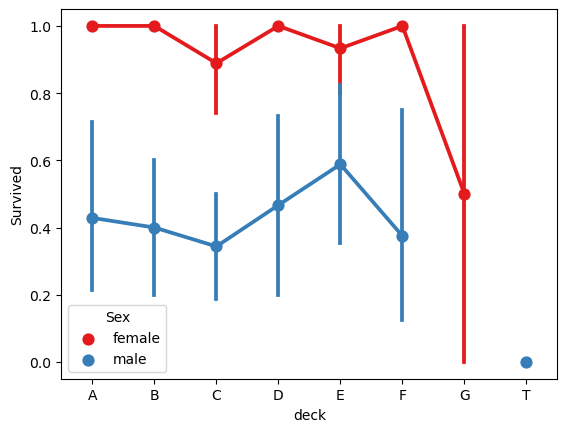

In [59]:
# Plotting the above data
sns.pointplot(x = 'deck', y = 'Survived', hue = 'Sex', data = titanic_df_v2, order=["A","B","C","D","E","F","G","T"], errorbar= None, palette='Set1')

In [60]:
# Number of survivor and deceased by class from each deck
surclass = titanic_df_v2.groupby(['deck','Pclass','survivor'])[['survivor']].count()
surclass.columns = ['count']
surclass.unstack(fill_value=0)

count    
survivor       No Yes
deck Pclass          
A    1          8   7
B    1         12  35
C    1         24  35
D    1          7  22
     2          1   3
E    1          7  18
     2          1   3
     3          0   3
F    2          1   7
     3          4   1
G    3          2   2
T    1          1   0

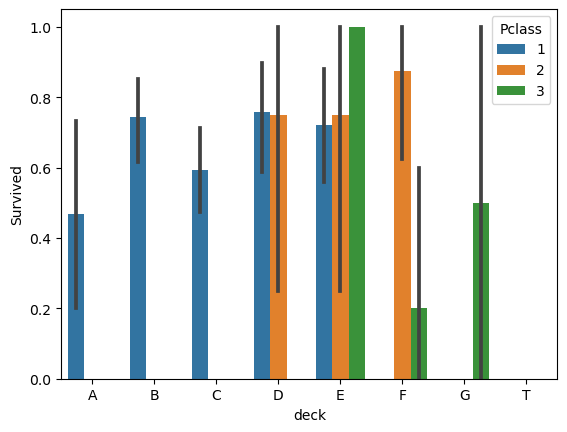

In [61]:
# Plotting the above result
sns.barplot(x = 'deck', y = 'Survived', hue = 'Pclass', data = titanic_df_v2, order=["A","B","C","D","E","F","G","T"])
plt.legend(loc = 'upper right', title = 'Pclass') # Change the location of the legend box

In [62]:
# Number of survivors and deceased by family
surfam = titanic_df.groupby(['family','survivor'])[['survivor']].count()
surfam.columns = ['count']
surfam.unstack(fill_value=0)

count     
survivor    No  Yes
family             
0          374  163
1           72   89
2           43   59
3            8   21
4           12    3
5           19    3
6            8    4
7            6    0
10           7    0

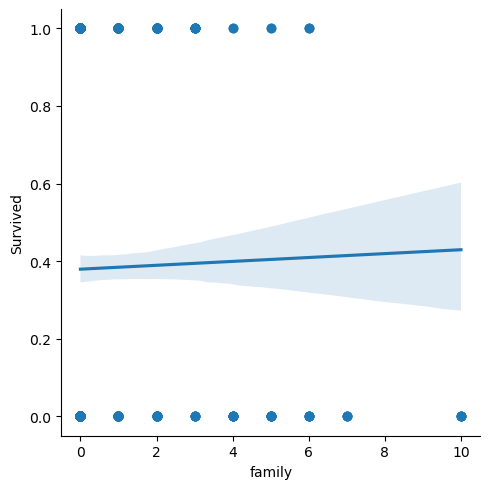

In [63]:
# Plotting the survival rate across families
sns.lmplot(x = 'family', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='family', ylabel='Survived'>

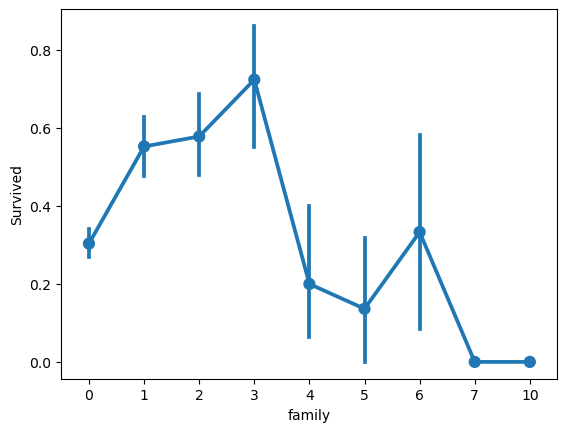

In [64]:
# Plotting the survival rate across families
sns.pointplot(x = 'family', y = 'Survived', data = titanic_df)

In [65]:
# Grouping the family data by class
surfamcl = titanic_df.groupby(['family','Pclass','survivor'])[['survivor']].count()
surfamcl.columns = ['count']
surfamcl.unstack(fill_value=0)

count    
survivor         No Yes
family Pclass          
0      1         51  58
       2         68  36
       3        255  69
1      1         19  51
       2         16  18
       3         37  20
2      1          6  18
       2         10  21
       3         27  20
3      1          2   5
       2          3  10
       3          3   6
4      1          0   2
       2          0   1
       3         12   0
5      1          2   2
       2          0   1
       3         17   0
6      3          8   4
7      3          6   0
10     3          7   0

<AxesSubplot:xlabel='family', ylabel='Survived'>

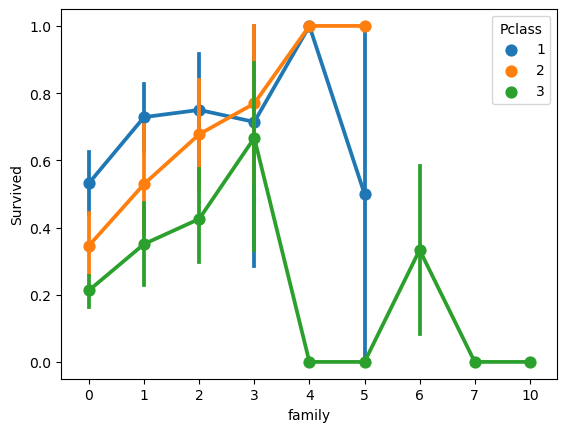

In [68]:
# Plotting the above data
sns.pointplot(x = 'family', y = 'Survived', hue='Pclass', data = titanic_df, errorbar=None)

## Conclusions

After a deep analysis into the titanic data we have come to certain conclusions upon the survival point of the sinking:

1. The class of a passenger played a major role in the survival point. As we saw through out the analysis, almost **~40%** of the survivors belonged to the first class. 
2. The sex of a passenger also played an important role in the survival point, the female passengers were given the top priority in saving lives, **~60%** of the survivors were female. Children were also given priority, **~59%** of the children survived the sinking.
3. Looking into age data, the trend is inclined downwards, indicating less survival for older people. Most of the survivors were of the age between **10-35**. But it was interesting to see when compared among sex data, older female passengers had higher survival rate compared to others.
4. The deck of passenger did not have direct effect on the survival rate, but we can say that the decks that were filled with **first class** passengers viz. deck **B**, **C**, **D**, also **E**, had higher survival rate.
5. Having a family did not directly effect the survival rate, but the number of members in a family did have some value to add. We saw that passengers with **1-3** family members did have a higher survival rate, but more than **3** make the survial rate fall down drastically.
6. Lastly, travelling alone is never a good idea, as we saw that survival of lone passengers had lower survival rate compared to having atleast **1 family member**. So, travel with friends and family, have more fun and also more survival rate if any mishaps.